In [1]:
import torchvision
import torch
import time

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [2]:
data_dir = './data/letters/'
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]

val_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(means, stds,),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((224,224)),
#         transforms.Grayscale(num_output_channels=1),
    ]
)

val_data = datasets.ImageFolder(data_dir + '/val', transform=val_transforms)
valloader = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.conv4 = nn.Conv2d(32, 48, 5)
        self.fc1 = nn.Linear(4800, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
#         print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = torch.softmax(x, dim=1)
        return x

In [82]:
PATH = './models/letters.pth'
# torch.save(model.state_dict(), PATH)
net = Net()
net.load_state_dict(torch.load(PATH))


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def map_prediction(results):
    results = results.to('cpu').detach().numpy()
    results = results.squeeze()
    indx = np.where(results == np.max(results))[0][0]
    return indx

def get_prediction(model, image, label):
    orig = image.squeeze().permute(1,2,0).numpy()
    image = image.to(device)
    features = model(image).unsqueeze(1)
    plt.imshow(orig, cmap='gray')
    indx = map_prediction(features)
    plt.title(f'Detected Class: {classes[indx]}')
    plt.show()
    return features

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


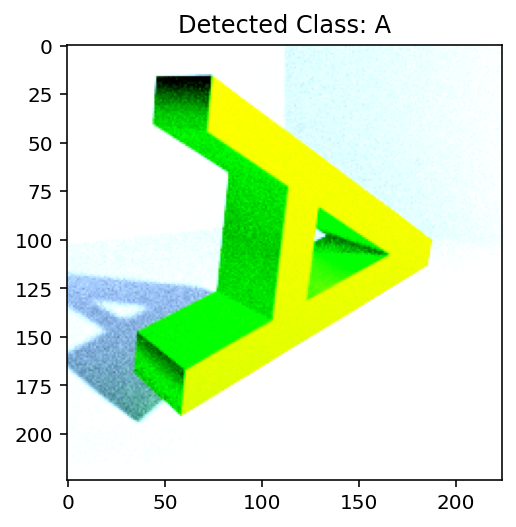

In [128]:
model = net
model.eval()
model.to(device)
classes = ['A', 'B', 'C']
orig_image, label = next(iter(valloader))
prediction = get_prediction(model, orig_image, label)

In [7]:
# This


























